## IterativeImputer
### This notebook outlines the usage of Iterative Imputer (Multivariate Imputation).
### Iterative Imputer substitutes missing values as a function of other features
#### Dataset: [https://github.com/subashgandyer/datasets/blob/main/heart_disease.csv]

**Demographic**
- Sex: male or female(Nominal)
- Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

**Behavioral**
- Current Smoker: whether or not the patient is a current smoker (Nominal)
- Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical(history)**
- BP Meds: whether or not the patient was on blood pressure medication (Nominal)
- Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
- Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
- Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**
- Tot Chol: total cholesterol level (Continuous)
- Sys BP: systolic blood pressure (Continuous)
- Dia BP: diastolic blood pressure (Continuous)
- BMI: Body Mass Index (Continuous)
- Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
- Glucose: glucose level (Continuous)

**Predict variable (desired target)**
- 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### How many Categorical variables in the dataset?

In [3]:
df.info()
categorical_feature_names = []

for feature_name in df.columns:
    unique_values = df[feature_name].unique()

    # Check if the feature has only the values 1 and 0
    if set(unique_values) == {0, 1}:
        categorical_feature_names.append(feature_name)

print("List of categorical feature names including education:")
categorical_feature_names.append('education')
print(categorical_feature_names)
print(f"There are {len(categorical_feature_names)} categorical features")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
List of categ

### How many Missing values in the dataset?
Hint: df.Series.isna( ).sum( )

In [4]:
for i in range(len(df.columns)):
    missing_data = df[df.columns[i]].isna().sum()
    perc = missing_data / len(df) * 100
    print(f'{df.columns[i]} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

male >> Missing entries: 0  |  Percentage: 0.0
age >> Missing entries: 0  |  Percentage: 0.0
education >> Missing entries: 105  |  Percentage: 2.48
currentSmoker >> Missing entries: 0  |  Percentage: 0.0
cigsPerDay >> Missing entries: 29  |  Percentage: 0.68
BPMeds >> Missing entries: 53  |  Percentage: 1.25
prevalentStroke >> Missing entries: 0  |  Percentage: 0.0
prevalentHyp >> Missing entries: 0  |  Percentage: 0.0
diabetes >> Missing entries: 0  |  Percentage: 0.0
totChol >> Missing entries: 50  |  Percentage: 1.18
sysBP >> Missing entries: 0  |  Percentage: 0.0
diaBP >> Missing entries: 0  |  Percentage: 0.0
BMI >> Missing entries: 19  |  Percentage: 0.45
heartRate >> Missing entries: 1  |  Percentage: 0.02
glucose >> Missing entries: 388  |  Percentage: 9.16
TenYearCHD >> Missing entries: 0  |  Percentage: 0.0


### Bonus: Visual representation of missing values

<Axes: >

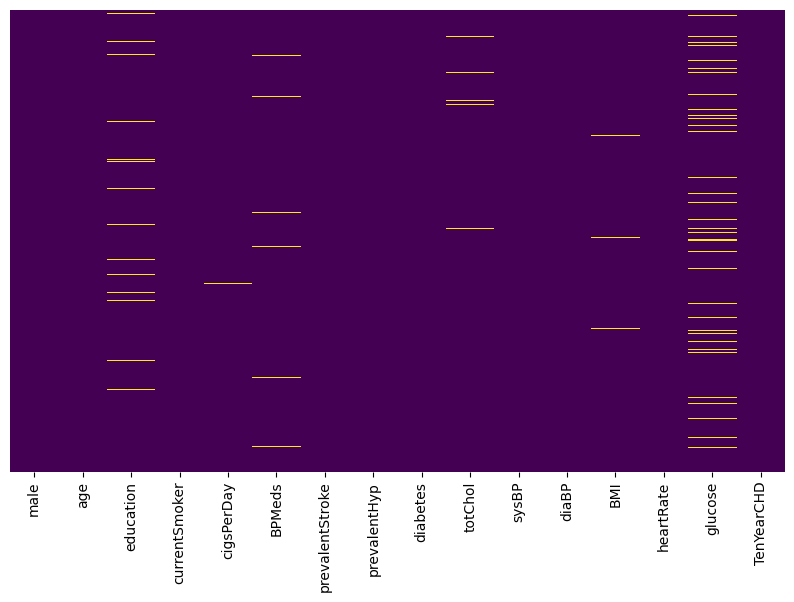

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

### Import IterativeImputer

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Create IterativeImputer object with max_iterations and random_state=0

In [7]:
imputer = IterativeImputer(max_iter=10, random_state=1)

### Optional - converting df into numpy array

In [8]:
data = df.values

In [9]:
X = data[:, :-1]
y = data[:, -1]

### Fit the imputer model on dataset to perform iterative multivariate imputation

In [10]:
imputer.fit(X)

IterativeImputer(random_state=1)

### Trained imputer model is applied to dataset to create a copy of dataset with all filled missing values using transform( ) 

In [11]:
X_transform = imputer.transform(X)

### Sanity Check: Whether missing values are filled or not

In [12]:
print(f"Missing cells: {sum(np.isnan(X).flatten())}")

Missing cells: 645


In [13]:
print(f"Missing cells: {sum(np.isnan(X_transform).flatten())}")

Missing cells: 0


### Let's try to visualize the missing values.

<Axes: >

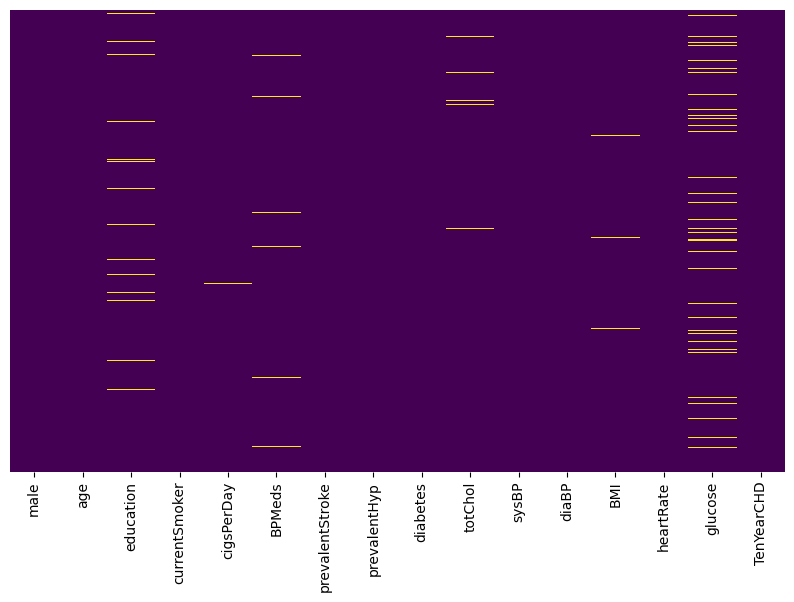

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

<Axes: >

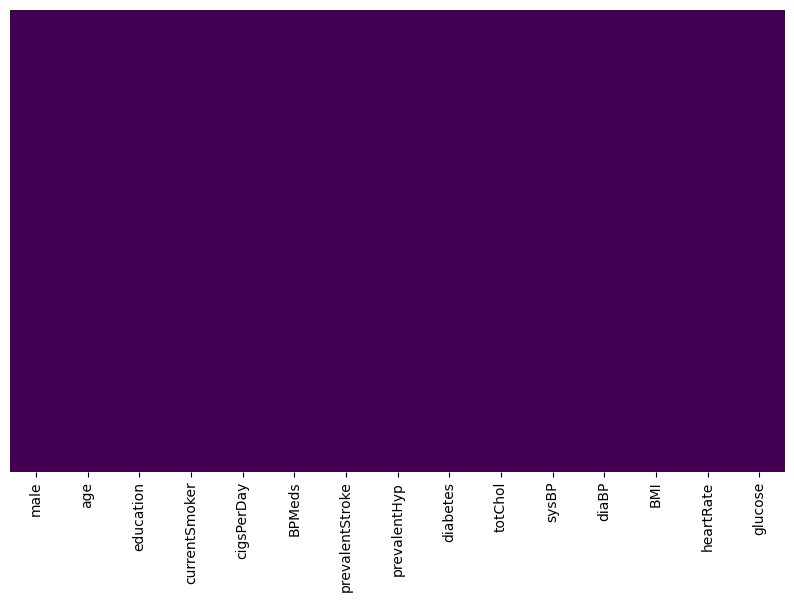

In [15]:
# Convert the numpy array X_transform back to a DataFrame
df_transformed = pd.DataFrame(data=X_transform, columns=df.columns[:-1])

plt.figure(figsize=(10,6))
sns.heatmap(df_transformed.isna(), cbar=False, cmap='viridis', yticklabels=False)


### What's the issue here?
#### Hint: Heatmap needs a DataFrame and not a Numpy Array

In [16]:
df_transform = pd.DataFrame(data=X_transform)
df_transform

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,39.0,4.0,0.0,0.0,0.00000,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.00000
1,0.0,46.0,2.0,0.0,0.0,0.00000,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.00000
2,1.0,48.0,1.0,1.0,20.0,0.00000,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.00000
3,0.0,61.0,3.0,1.0,30.0,0.00000,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.00000
4,0.0,46.0,3.0,1.0,23.0,0.00000,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,50.0,1.0,1.0,1.0,0.00000,0.0,1.0,0.0,313.0,179.0,92.0,25.97,66.0,86.00000
4234,1.0,51.0,3.0,1.0,43.0,0.00000,0.0,0.0,0.0,207.0,126.5,80.0,19.71,65.0,68.00000
4235,0.0,48.0,2.0,1.0,20.0,0.01547,0.0,0.0,0.0,248.0,131.0,72.0,22.00,84.0,86.00000
4236,0.0,44.0,1.0,1.0,15.0,0.00000,0.0,0.0,0.0,210.0,126.5,87.0,19.16,86.0,77.74894


<Axes: >

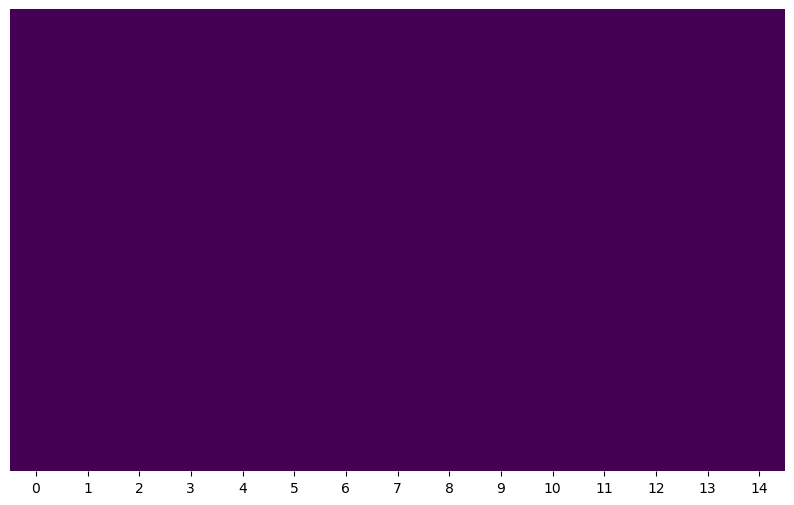

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df_transform.isna(), cbar=False, cmap='viridis', yticklabels=False)

# Check if these datasets contain missing data
### Load the datasets

In [18]:
X_train = pd.read_csv("X_train.csv")
Y_train = pd.read_csv("Y_train.csv")
Y_test = pd.read_csv("Y_test.csv")
X_test = pd.read_csv("X_test.csv")

In [19]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((384, 12), (384, 1), (96, 12), (96, 1))

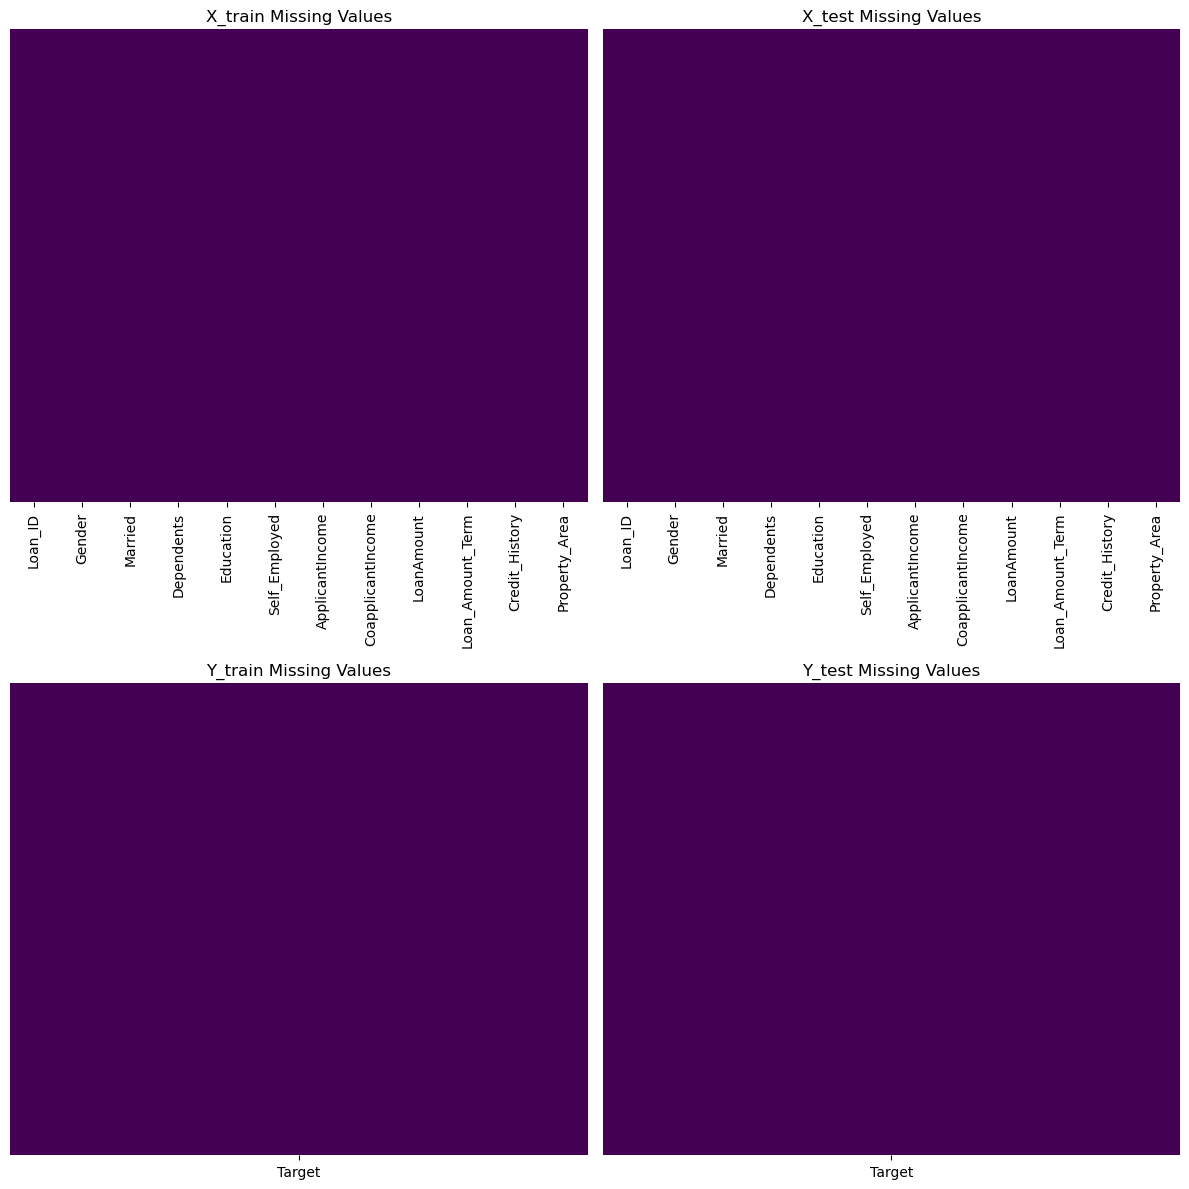

In [20]:
# Set up subplots
plt.figure(figsize=(12, 12))

# Plot for X_train
plt.subplot(2, 2, 1)
sns.heatmap(X_train.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('X_train Missing Values')

# Plot for X_test
plt.subplot(2, 2, 2)
sns.heatmap(X_test.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('X_test Missing Values')

# Plot for Y_train
plt.subplot(2, 2, 3)
sns.heatmap(Y_train.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Y_train Missing Values')

# Plot for Y_test
plt.subplot(2, 2, 4)
sns.heatmap(Y_test.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Y_test Missing Values')

plt.tight_layout()
plt.show()

### Is there missing data in this dataset???

In [21]:
#NO

# Build a Logistic Regression model Without imputation

In [22]:
df=pd.read_csv("heart_disease.csv")
X = df[df.columns[:-1]].fillna(method='ffill')
y = df[df.columns[-1]]

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X,y)
# Make predictions
y_pred = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {(accuracy*100).round(2)}%")

Accuracy: 84.97%


C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Drop all rows with missing entries - Build a Logistic Regression model and benchmark the accuracy

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [27]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [28]:
df.shape

(4238, 16)

### Drop rows with missing values

In [29]:
df = df.dropna()
df.shape

(3656, 16)

### Split dataset into X and y

In [30]:
X = df[df.columns[:-1]]
X.shape

(3656, 15)

In [31]:
y = df[df.columns[-1]]
y.shape

(3656,)

### Create a pipeline with model parameter

In [32]:
pipeline = Pipeline([('model', model)])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [33]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [34]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [35]:
scores

array([0.85519126, 0.85245902, 0.85245902, 0.83879781, 0.84699454,
       0.8442623 , 0.84383562, 0.86027397, 0.84109589, 0.84109589,
       0.85245902, 0.84972678, 0.85245902, 0.8442623 , 0.85519126,
       0.84699454, 0.84109589, 0.84383562, 0.85479452, 0.84657534,
       0.85245902, 0.84972678, 0.86065574, 0.8442623 , 0.85245902,
       0.84699454, 0.84931507, 0.85205479, 0.84657534, 0.83835616])

### Print the Mean Accuracy and Standard Deviation from scores

In [36]:
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.849  | Std: 0.006


# Build a Logistic Regression model with IterativeImputer(also used standard scaler)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [38]:
df=pd.read_csv("heart_disease.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Split dataset into X and y

In [39]:
df.shape

(4238, 16)

In [40]:
X = df[df.columns[:-1]]
X.shape

(4238, 15)

In [41]:
y = df[df.columns[-1]]
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

### Create a SimpleImputer with mean strategy

In [42]:
imputer = IterativeImputer(max_iter=10, random_state=1)

### Create a Logistic Regression model

In [43]:
# Create a pipeline with imputation, scaling, and model
model = LogisticRegression()
scaler = StandardScaler()

### Create a pipeline with impute and model parameters

In [44]:
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('model', model)
])

### Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1

In [45]:
# Create a RepeatedStratifiedKFold with 10 splits and 3 repeats and random_state=1
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)




### Call cross_val_score with pipeline, X, y, accuracy metric and cv

In [46]:
# Call cross_val_score with pipeline, X, y, accuracy metric, and cv
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


In [47]:
scores

array([0.85141509, 0.85613208, 0.8490566 , 0.85377358, 0.86320755,
       0.85613208, 0.84669811, 0.85613208, 0.86288416, 0.85815603,
       0.85377358, 0.84669811, 0.84433962, 0.86084906, 0.8490566 ,
       0.86320755, 0.85377358, 0.85613208, 0.86052009, 0.86524823,
       0.85613208, 0.85849057, 0.85141509, 0.84669811, 0.8490566 ,
       0.85141509, 0.8490566 , 0.86320755, 0.85579196, 0.8534279 ])

### Print the Mean Accuracy and Standard Deviation

In [48]:
# Print the Mean Accuracy and Standard Deviation from scores
print(f"Mean Accuracy: {round(np.mean(scores), 3)}  | Std: {round(np.std(scores), 3)}")

Mean Accuracy: 0.855  | Std: 0.006


### Which accuracy is better? 
- Dropping missing values
- SimpleImputer with Mean Strategy

In [49]:
#ImputiveItr is better: 85.5% vs Dropping: 84.9% accuracy
#std Imputiveitr: 0.6% vs Dropping: 0.6%

# IterativeImputer with RandomForest

In [50]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


In [51]:
# Load your dataset
df = pd.read_csv("heart_disease.csv")

# Separate features (X) and target (y)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

imputer = IterativeImputer(max_iter=10, random_state=1)


In [52]:
rf_model = RandomForestClassifier()

In [53]:
# Create a pipeline with imputer, StandardScaler, and RandomForest
pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', StandardScaler()),
    ('rf', rf_model)
])

In [54]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)


In [55]:
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


In [56]:

print(f"Mean Accuracy: {round(np.mean(scores*100).round(2), 3)}%  | Std: {round(np.std(scores*100).round(2), 3)}%")


Mean Accuracy: 84.88%  | Std: 0.71%


# Run experiments with different Imputation methods and different algorithms

## Imputation Methods
- Mean
- Median
- Most_frequent
- Constant
- IterativeImputer

## ALGORITHMS
- Logistic Regression
- KNN
- Random Forest
- SVM
- Any other algorithm of your choice

In [59]:
import pandas as pd
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

# Load your dataset
df = pd.read_csv("heart_disease.csv")

# Separate features (X) and target (y)
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

# Define strategies for SimpleImputer
simple_imputer_strategies = ['mean', 'median', 'most_frequent', 'constant']

# Algorithms
algorithms = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier()),
    ('CatBoost', CatBoostClassifier(silent=True)),
    ('Naive Bayes', GaussianNB()),
    ('Bagging', BaggingClassifier(base_estimator=None, n_estimators=10, random_state=1)),
    ('Stacking', StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier())], final_estimator=LogisticRegression()))
]

# Create an empty list to store results
results = []

# Create IterativeImputer
iterative_imputer = IterativeImputer(max_iter=10, random_state=1)

# Iterate over strategies and algorithms
for simple_strategy in simple_imputer_strategies:
    for algo_name, algo_model in algorithms:
        # Create a SimpleImputer with the current strategy
        simple_imputer = SimpleImputer(strategy=simple_strategy)

        # Create a pipeline with SimpleImputer, IterativeImputer, StandardScaler, and the current algorithm
        pipeline = Pipeline([
            ('simple_imputer', simple_imputer),
            ('iterative_imputer', iterative_imputer),
            ('scaler', StandardScaler()),
            ('model', algo_model)
        ])

        # Create RepeatedStratifiedKFold
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

        # Create Cross_val_score
        scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)

        # Append results to the list
        results.append({
            'Imputer': 'Both',
            'Simple Imputer Strategy': simple_strategy,
            'Algorithm': algo_name,
            'Mean Accuracy': scores.mean(),
            'Standard Deviation': scores.std()
        })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)
# Convert the mean accuracy and standard deviation to percentage format
results_df['Mean Accuracy'] = (results_df['Mean Accuracy'] * 100).round(2)
results_df['Standard Deviation'] = (results_df['Standard Deviation'] * 100).round(2)

# Display the results
print(results_df)


[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Nu

C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-p

[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000778 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM]

C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-p

[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Nu

C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-p

[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Number of positive: 580, number of negative: 3234
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1021
[LightGBM] [Info] Number of data points in the train set: 3814, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152071 -> initscore=-1.718447
[LightGBM] [Info] Start training from score -1.718447
[LightGBM] [Info] Nu

C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\macwa\anaconda3\Lib\site-p

   Imputer Simple Imputer Strategy            Algorithm  Mean Accuracy  \
0     Both                    mean  Logistic Regression          85.46   
1     Both                    mean                  KNN          83.40   
2     Both                    mean        Random Forest          84.83   
3     Both                    mean    Gradient Boosting          84.60   
4     Both                    mean                  SVM          84.82   
5     Both                    mean              XGBoost          83.53   
6     Both                    mean             LightGBM          84.43   
7     Both                    mean             CatBoost          84.49   
8     Both                    mean          Naive Bayes          82.41   
9     Both                    mean              Bagging          83.40   
10    Both                    mean             Stacking          85.36   
11    Both                  median  Logistic Regression          85.46   
12    Both                  median    



# Q1: Which is the best strategy for this dataset using Random Forest algorithm?
SimpleImputer(Mean): 84.83%
SimpleImputer(Median): 84.91%
SimpleImputer(Most_frequent): 84.94%
SimpleImputer(Constant): 84.91%
IterativeImputer: 84.83%
While the mean accuracy values are close, the strategy 'SimpleImputer(Most_frequent)' has the highest mean accuracy, followed by 'SimpleImputer(Constant)'.

# Q2:  Which is the best algorithm for this dataset using IterativeImputer?
It seems that the Random Forest algorithm performs well with IterativeImputer.

# Q3: Which is the best combination of algorithm and best Imputation Strategy overall?
It looks like the combination of 'SimpleImputer(Most_frequent)' with the 'Random Forest' algorithm has a high mean accuracy (84.94%) and relatively low standard deviation (0.61%). This combination appears to be a strong performer.